In [6]:
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import importlib
imported_module = importlib.import_module("tsp_genetic_algorithm")
importlib.reload(imported_module)
from tsp_genetic_algorithm import TSP

# Load the original TSP problem
original_problem = tsplib95.load('att48.tsp')



In [7]:
# Extract node coordinates for the first N cities

N = 30

reduced_nodes = {key: original_problem.node_coords[key] for key in list(original_problem.get_nodes())[:]}

# Create a new TSP problem with only 5 cities
reduced_problem = tsplib95.models.StandardProblem(comment="Reduced TSP to " + str(N) + "cities")
reduced_problem.node_coords = reduced_nodes

tsp = TSP(reduced_problem, 200, 1000, 1, 0.2)
tsp.run()

Initial fitness: 
7.66991869021188e-06
Fitness generation number 0: 
9.180402770207362e-06
Fitness generation number 1: 
9.208088813875109e-06
Fitness generation number 2: 
9.533999672876788e-06
Fitness generation number 3: 
1.0326064993088298e-05
Fitness generation number 4: 
1.0634928134595823e-05
Fitness generation number 5: 
1.1809655175044917e-05
Fitness generation number 6: 
1.1809655175044917e-05
Fitness generation number 7: 
1.1884128656546559e-05
Fitness generation number 8: 
1.2173670595014978e-05
Fitness generation number 9: 
1.2371883198872771e-05
Fitness generation number 10: 
1.2747616983759698e-05
Fitness generation number 11: 
1.2975847331933429e-05
Fitness generation number 12: 
1.376651093275791e-05
Fitness generation number 13: 
1.376651093275791e-05
Fitness generation number 14: 
1.3854022557506096e-05
Fitness generation number 15: 
1.3854022557506096e-05
Fitness generation number 16: 
1.4426599987141129e-05
Fitness generation number 17: 
1.4426599987141129e-05
Fitn

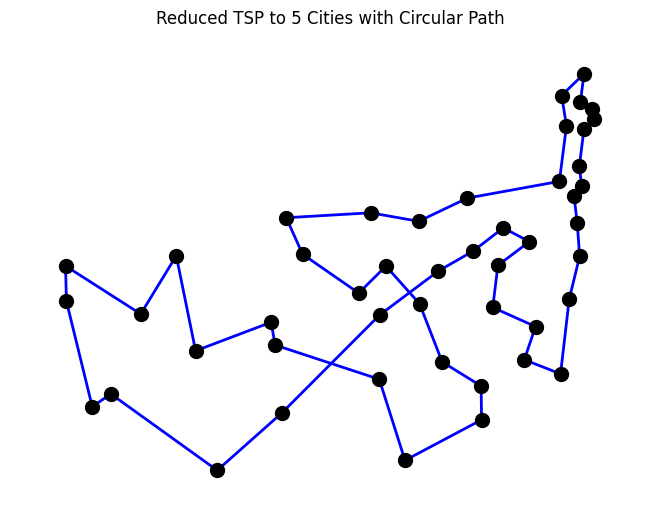

In [8]:
# Assuming reduced_nodes is a dictionary containing node coordinates

# Create a graph and add nodes
G = nx.Graph()
G.add_nodes_from(reduced_nodes.keys())

# Draw the nodes
pos = {node: (reduced_nodes[node][0], reduced_nodes[node][1]) for node in reduced_nodes}
nx.draw(G, pos, node_color='black', with_labels=False, node_size=100)

# Draw the circular path stored in tsp.elite[0]
elite_path = tsp.elite[0]  # Assuming tsp.elite[0] contains the circular path

# Add edges for the circular path
for i in range(len(elite_path) - 1):
    G.add_edge(elite_path[i], elite_path[i + 1])

# Connect the last and first nodes to complete the circular path
G.add_edge(elite_path[-1], elite_path[0])

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[i], elite_path[i + 1]) for i in range(len(elite_path) - 1)], edge_color='blue', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[-1], elite_path[0])], edge_color='blue', width=2)

plt.title('Reduced TSP to ' + str(N) +' Cities with Circular Path')
plt.show()
